In [10]:
import numpy as np

def gradient_descent(X, y, learning_rate, n_iterations, batch_size=1, method='batch'):

    weights=np.zeros(len(X[0]))
    loss_array=[]

    def feed_forward(array, weight):
        return np.dot(array, weight)

    def loss(array, y,w):
        count = 0
        for i, j in zip(array, y):
            count = count + (feed_forward(i, w) - j) ** 2
        return count / (2 * len(y))
    
    def update_batch(weight, array, y):
        w=np.zeros(len(array[0]))
        for i in range(0,len(weight)):
            for j in range(0,len(y)):
                w[i] = w[i] + ((feed_forward(array[j], weight) - y[j]) * array[j][i])
        for i in range (0,len(weight)):
            weight[i]-= learning_rate*2*(w[i]/len(y))
    
    def update_s(weight,array,y):
        
        for i in range (0,len(y)):
            w=np.zeros(len(weight))
            for j in range (0,len(weight)):
                w[j]= (feed_forward(array[i], weight)-y[i])*array[i][j]
            for k in range (0,len(weight)):
                weight[k]=weight[k] -learning_rate*2*(w[k])
    
    def update_mini(weight, array, y,size):
        
        w=np.zeros(len(weight))
        count=0
        
        for i in range (0,len(y)):
            for j in range (0,len(weight)):
                w[j]= w[j]+(feed_forward(array[i], weight)-y[i])*array[i][j]
            count=count+1
            if count==size:
                for k in range (0,len(weight)):
                    weight[k]=weight[k] -learning_rate*2*(w[k]/size)
                w=np.zeros(len(weight))
                count=0
          


    if method == 'batch':
        for i in range (0,n_iterations):
            loss_array.append(loss(X,y,weights))
            update_batch(weights,X,y)
    elif method == 'stochastic':
        for i in range (0,n_iterations):
            loss_array.append(loss(X,y,weights))
            update_s(weights,X,y)
    elif method == 'mini_batch':
        for i in range (0,n_iterations):
            loss_array.append(loss(X,y,weights))
            update_mini(weights,X,y,batch_size)
    return np.array(loss_array),weights
    

In [11]:
# Features (X1, X2, X3)
X = np.array([
    [1, 2, 1],
    [2, 3, 2],
    [3, 4, 3],
    [4, 5, 4],
    [5, 6, 5]
], dtype=float)

# y = 2*X1 + 3*X2 + 4*X3 + 5
y = np.array([21, 32, 43, 54, 65], dtype=float)

In [12]:
loss_batch,weights_batch=gradient_descent(X,y,0.01,20,method='batch')

In [13]:
loss_stochastic,weights_stochastic=gradient_descent(X,y,0.01,20,method='stochastic')

In [14]:
loss_minibatch,weights_minibatch=gradient_descent(X,y,0.01,20, batch_size=2,method='mini_batch')

In [1]:
import matplotlib.pyplot as plt

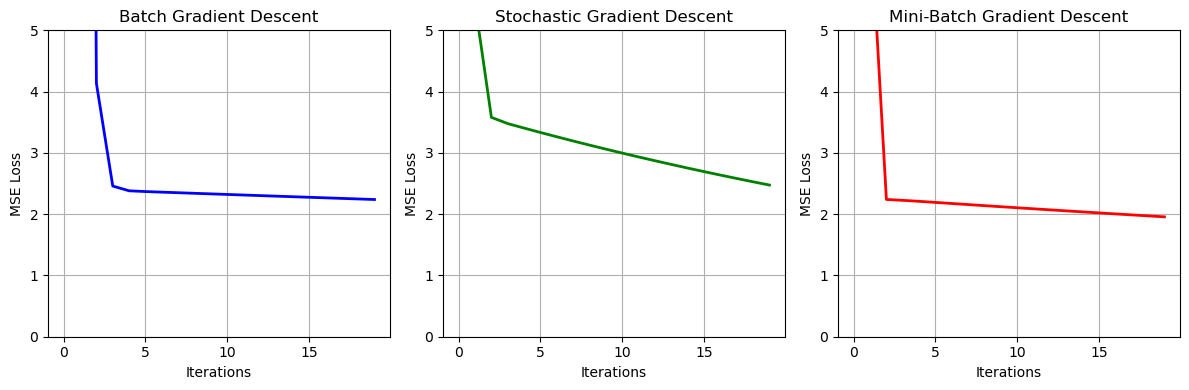

In [31]:
iterations = range(len(loss_batch))  # common x-axis

plt.figure(figsize=(12, 4))

# Subplot 1: Batch
plt.subplot(1, 3, 1)
plt.plot(iterations, loss_batch, label="Batch GD", linewidth=2, color="blue")
plt.xlabel("Iterations")
plt.ylabel("MSE Loss")
plt.title("Batch Gradient Descent")
plt.ylim(0,5)   # zoom in: loss from 1 → 0
plt.grid(True)

# Subplot 2: Stochastic
plt.subplot(1, 3, 2)
plt.plot(iterations, loss_stochastic, label="Stochastic GD", linewidth=2, color="green")
plt.xlabel("Iterations")
plt.ylabel("MSE Loss")
plt.title("Stochastic Gradient Descent")
plt.ylim(0,5)   # same zoom
plt.grid(True)

# Subplot 3: Mini-Batch
plt.subplot(1, 3, 3)
plt.plot(iterations, loss_minibatch, label="Mini-Batch GD", linewidth=2, color="red")
plt.xlabel("Iterations")
plt.ylabel("MSE Loss")
plt.title("Mini-Batch Gradient Descent")
plt.ylim(0,5)   # same zoom
plt.grid(True)

plt.tight_layout()
plt.show()

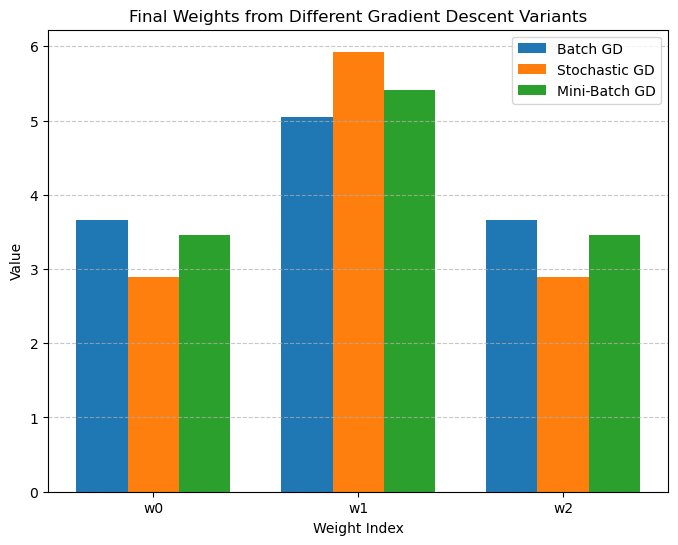

In [25]:
methods = ["Batch GD", "Stochastic GD", "Mini-Batch GD"]
weights = [weights_batch, weights_stochastic, weights_minibatch]

weights = np.array(weights)  # shape (3, n_features)
n_methods, n_features = weights.shape

x = np.arange(n_features)  # features index
width = 0.25  # bar width

fig, ax = plt.subplots(figsize=(8,6))

# Plot bars for each method
for i, method in enumerate(methods):
    ax.bar(x + i*width, weights[i], width, label=method)

# Labeling
ax.set_xlabel("Weight Index")
ax.set_ylabel("Value")
ax.set_title("Final Weights from Different Gradient Descent Variants")
ax.set_xticks(x + width)
ax.set_xticklabels([f"w{i}" for i in range(n_features)])
ax.legend()
ax.grid(True, axis='y', linestyle="--", alpha=0.7)

plt.show()